Visualizes the Kaggle Galaxy Zoo predictions from fine-tuned Resnet50 model

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
from skimage.transform import resize

In [5]:
def crop_image(image):
  #Image - numpy array of rank 3
  #Crop image to half its size, preserving the center
  #resize image to shape
  im_size_x = image.shape[0]
  im_size_y = image.shape[0]
  cropx = im_size_x // 4
  cropy = im_size_y // 4
  image = image[cropx:im_size_x-cropx, cropy:im_size_y-cropy]

  re_shape = [64,64]
  image = resize(image, re_shape)
  return image

In [10]:
# Read the predictions
pred_df = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Galaxy_Zoo_Full/Resnet/Resnet50/test_submission.csv')
pred_df.head()

,File_Name,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100018.jpg,0.353068,0.619899,0.012225,0.044644,0.556780,0.154079,0.398631,0.143746,0.450112,0.021060,0.183851,0.437127,0.013940,0.102807,0.895879,0.013828,0.430278,0.011516,0.004888,0.004630,0.022733,0.015612,0.043736,0.009906,0.000781,0.024822,0.003697,0.005549,0.059614,0.061988,0.016847,0.003396,0.025772,0.004185,0.003638,0.005544,0.077866
1,100037.jpg,0.526259,0.483985,0.008684,0.569279,0.066302,0.017318,0.071641,0.018716,0.075248,0.090740,0.018371,0.003580,0.006274,0.161383,0.843852,0.000747,0.035861,0.335663,0.003494,0.008957,0.019206,0.026167,0.105057,0.019744,0.002187,0.116152,0.026674,0.243950,0.021393,0.003069,0.010532,0.002842,0.007783,0.000845,0.000404,0.002295,0.006708
2,100042.jpg,0.599412,0.400795,0.023769,0.282814,0.089044,0.025930,0.055350,0.006495,0.107594,0.045107,0.025925,0.006597,0.006136,0.089486,0.913423,0.000542,0.049055,0.525958,0.002071,0.004155,0.009326,0.009226,0.051921,0.005225,0.001989,0.058339,0.026567,0.173871,0.003003,0.002463,0.002407,0.000269,0.001819,0.000122,0.000051,0.000106,0.007393
3,100052.jpg,0.616554,0.364076,0.044212,0.021512,0.394004,0.022094,0.323640,0.026662,0.378784,0.007584,0.151306,0.158729,0.128397,0.099389,0.893295,0.366911,0.215484,0.001328,0.008266,0.016601,0.017188,0.017390,0.033309,0.009478,0.003017,0.022629,0.001974,0.001411,0.009390,0.012607,0.006444,0.007158,0.004276,0.001679,0.000752,0.004160,0.012852
4,100056.jpg,0.226622,0.735958,0.009342,0.720734,0.046178,0.020993,0.024043,0.020676,0.026644,0.013046,0.019849,0.005125,0.000952,0.064990,0.932593,0.000315,0.000690,0.200670,0.003173,0.003853,0.011743,0.005283,0.020084,0.002597,0.005201,0.181300,0.028431,0.474643,0.003818,0.010038,0.008002,0.001264,0.006703,0.000183,0.000619,0.000859,0.007775


- Class 1.1 - Smooth
- Class 1.2 - Features or disk
- Class 1.3 - Star or artifact
- Class 2.1 - “Yes” for “Edge-on”
- Class 2.2 - “No” for “Edge-on”
- Class 3.1 - Bar structure
- Class 3.2 - No bar structure
- Class 4.1 - Spiral structure
- Class 4.2 - No Spiral structure
- Class 5.1 - No bulge
- Class 5.2 - Just noticeable bulge
- Class 5.3 - Obvious bulge
- Class 5.4 - Dominant bulge
- Class 6.1 - “Yes” to “Something odd”
- Class 6.2 - Nothing odd
- Class 7.1 - Smooth and completely round
- Class 7.2 - In-between roundness
- Class 7.3 - Smooth and cigar-shaped
- Class 8.1 - Odd feature is a ring
- Class 8.2 - Odd feature is a lens or arc
- Class 8.3 - Odd feature is a disturbed galaxy
- Class 8.4 - Odd feature is a disturbed galaxy
- Class 8.5 - Odd feature is something else
- Class 8.6 - Odd feature is a merger
- Class 8.7 Odd feature is a dust lane
- Class 9.1 - Edge-on bulge is rounded
- Class 9.2 - Edge-on bulge is boxy
- Class 9.3 - Edge-on - no bulge
- Class 10.1 - Tightly wound spiral arms
- Class 10.2 - Medium wound spiral arms
- Class 10.3 - Loosely wound spiral arms
- Class 11.1 - One spiral arm
- Class 11.2 - Two spiral arms
- Class 11.3 - Three spiral arms
- Class 11.4 - Four spiral arms
- Class 11.5 - More than four spiral arms
- Class 11.6 - Spiral arms present - but can’t tell how many




In [ ]:
image_dir ='/content/drive/MyDrive/Data_Science_Projects/Galaxy_Zoo_Full/Resnet/Resnet50/test_images_subset/'

# Select a random test image
testimg_list = os.listdir(image_dir) # list of files in test image directory
n_testimg = len(os.listdir(image_dir)) # number of files in test image directory
img_num = np.random.randint(0,n_testimg) 
srow = pred_df.loc[pred_df['File_Name']==testimg_list[img_num]] 

File name:  101145.jpg
Smooth:  no
Features or Disk:  yes
Star or Artifact:  no
Edge-on:  no
Spiral:  yes
Merger:  no


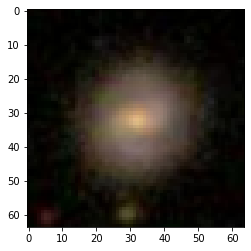

In [36]:
# Display selected test image
filename = srow['File_Name'].values[0]
im = plt.imread(image_dir+filename)
im_crop = crop_image(im)
plt.imshow(im_crop, cmap='Greys_r');

# Print predicted galaxy characteristics
if srow['Class1.1'].values[0] > 0.5:
  smooth = 'yes'
else:
  smooth = 'no'

if srow['Class1.2'].values[0] > 0.5:
  feat_disk = 'yes'
else:
  feat_disk = 'no'

if srow['Class1.3'].values[0] > 0.5:
  star_artifact = 'yes'
else:
  star_artifact = 'no'

if srow['Class2.1'].values[0] > srow['Class2.2'].values[0]:
  edge_on = 'yes'
else:
  edge_on = 'no'

if srow['Class4.1'].values[0] > srow['Class4.2'].values[0]:
  spiral = 'yes'
else:
  spiral = 'no'

if srow['Class8.6'].values[0] > 0.5:
  merger = 'yes'
else:
  merger = 'no'

print('File name: ', srow['File_Name'].values[0])
print('Smooth: ', smooth)
print('Features or Disk: ', feat_disk)
print('Star or Artifact: ', star_artifact)
print('Edge-on: ', edge_on)
print('Spiral: ', spiral)
print('Merger: ', merger)
